Load textures and cochleogram data 
---------------------------------------

In [59]:
import numpy as np
import os
npzfilename=os.path.join('airplan','rawFeatures.npz')
dataraw= np.load(npzfilename) 
dataraw=dataraw['arr_0'].item()
dataraw.keys()

['Tf', 'E', 'Pf', 'Ts', 'Ps']

Plotting
---------

Activating plotting magic


In [64]:
#Do not plot inline because of 3d plots
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


Load the PTN data
-------------------


In [65]:
npzfilename=os.path.join('AnalysisOfGygiDataset.npz')
PTNdata= np.load(npzfilename) 
PTNdata=PTNdata['arr_0'].item()
#PTNdata.keys()

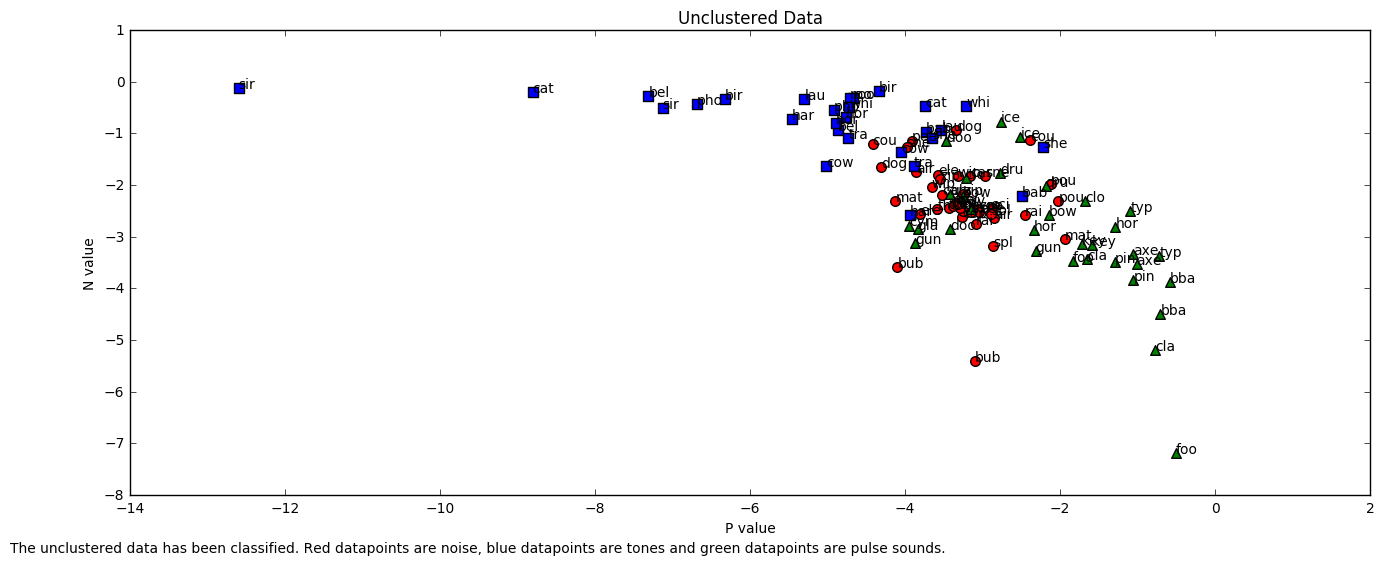

In [66]:
#Made by R. van Elburg. Used as an example.

f=plt.figure(figsize=(16,6,))
ax = f.add_subplot(1,1,1)
xs=PTNdata['P_logsumE_off_FS']
ys=PTNdata['T_logsumE_off_FS']

#ax.plot(xs, ys,'.' )

for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    ax.scatter( xs[typerange],ys[typerange], c=typecolor, marker=typemarker,s=48)

for label, x, y in zip(PTNdata['labels'], xs,ys):
    ax.text(x, y, label[:3], None)    

ax.set_xlabel('P value')
ax.set_ylabel('N value')
figtext(.05, .03, "The unclustered data has been classified. Red datapoints are noise, blue datapoints are tones and green datapoints are pulse sounds.")
plt.title('Unclustered Data')
plt.show()

# Visualization 1

Display the raw, unclustered, classified data in a 3d plot

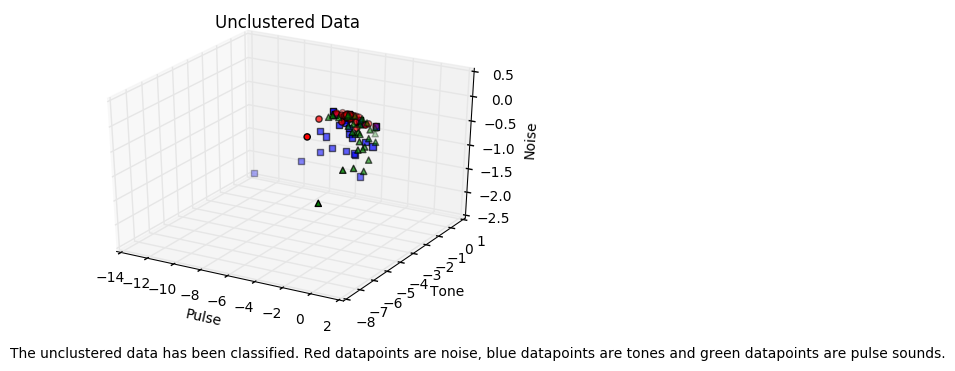

In [68]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
#for a 3d plot the projection needs to be set to 3d
ax = fig.add_subplot(111, projection='3d')

#xs, ys and zs are set to pulse, tone and noise data values respectively
xs=PTNdata['P_logsumE_off_FS']
ys=PTNdata['T_logsumE_off_FS']
zs=PTNdata['N_logsumE_off_FS']

#for each data point the data is read and plotted with the respective colour
for typecolor, typemarker  in [('r','o'),('g','^'),('b','s')]:
    typerange=PTNdata['typecolors'][typecolor]
    ax.scatter( xs[typerange],ys[typerange],zs[typerange], c=typecolor, marker=typemarker)

#Defines the axis labels on the plot
ax.set_xlabel('Pulse')
ax.set_ylabel('Tone')
ax.set_zlabel('Noise')
figtext(.05, .03, "The unclustered data has been classified. Red datapoints are noise, blue datapoints are tones and green datapoints are pulse sounds.")
plt.title('Unclustered Data')
#used to show the plot in output
plt.show()

# Visualization 2

Histogram visualiasion of raw input data

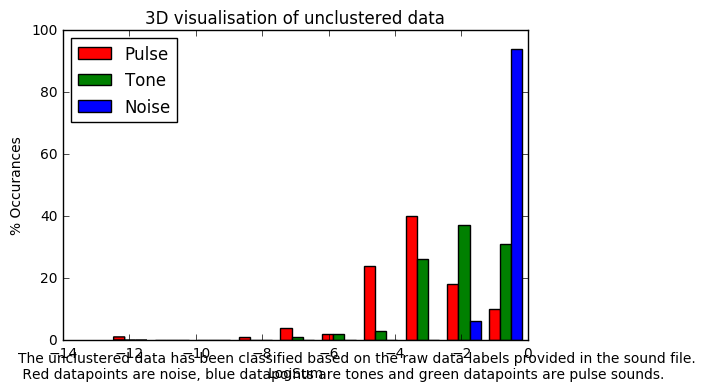

In [69]:
import pylab as P

#set the values for the histogram 
P.hist( [xs,ys,zs], 10,  histtype='bar', color=['red', 'green', 'blue'],
label=['Pulse', 'Tone', 'Noise'])

P.title('Histogram Representation of raw noise data')
P.ylabel('% Occurances')
P.xlabel('LogSum')

#display legend of upper left of plot area
P.legend(loc='upper left')
plt.title('3D visualisation of unclustered data')
figtext(.05, .03, "The unclustered data has been classified based on the raw data labels provided in the sound file. \n Red datapoints are noise, blue datapoints are tones and green datapoints are pulse sounds.")

#show the plot
P.show()

# Clustering

Adding k-means algorithm from scipy for pulse vs tone data

In [70]:
from pylab import plot,show
from numpy import vstack,array
from scipy.cluster.vq import kmeans,vq

#xs=PTNdata['P_logsumE_off_FS']
#ys=PTNdata['T_logsumE_off_FS']
#zs=PTNdata['N_logsumE_off_FS']

#merge data into one array
data = np.array([xs,ys]).T

#Determine the cluster means with 3 clusters
centroids,_ = kmeans(data,3)

#2 arrays which information on clusterdata
#vq assigns a code to observations, code can be related to the cluster
idx,_ = vq(data,centroids)

# Visualization 1

A 2d plot of P vs T with clustered datapoints

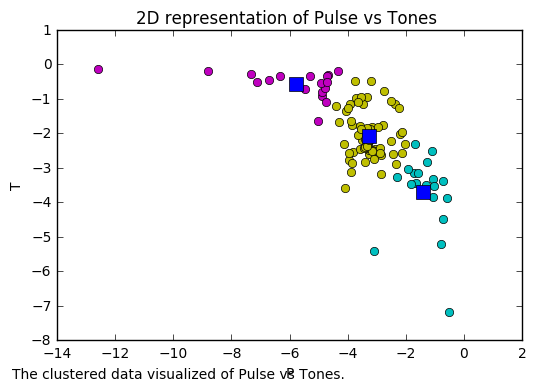

In [72]:
#Colors do not match with previous plots since initializaton of the clusters is 
#done randomly making the order in which the clusters get determined random
plot(data[idx==0,0],data[idx==0,1],'mo',
     data[idx==1,0],data[idx==1,1],'yo',
     data[idx==2,0],data[idx==2,1],'co') 
plot(centroids[:,0],centroids[:,1],'sb',markersize=10)
P.xlabel('P')
P.ylabel('T')
P.xlim([-14,2])
P.ylim([-8,1])
figtext(.05, .03, "The clustered data visualized of Pulse vs Tones.")
plt.title('2D representation of Pulse vs Tones ')
show()

# Visualization 2

A 3d plot of the clustered datapoints

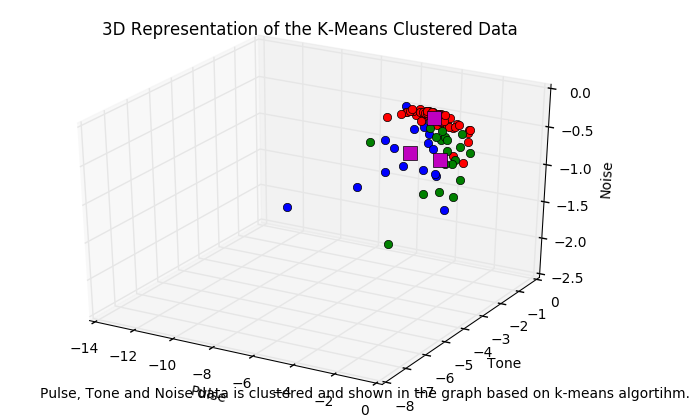

In [73]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
from scipy.cluster.vq import kmeans,vq


#sets the axes to 3d
fig = plt.figure()
ax=Axes3D(fig)


# merge data into one array
data =np.vstack((xs,ys,zs))
data = np.array([xs,ys,zs]).T


#calculate the centeriods 
centroids,_ = kmeans(data,3)

#assign each data point to a group based on the centeriods that they are closet to in distance
idx,_ = vq(data,centroids)


#plot the data values in the 3 seperate clusters
plot(data[idx==0,0],data[idx==0,1],data[idx==0,2],'ob')
plot(data[idx==1,0],data[idx==1,1],data[idx==1,2],'or')
plot(data[idx==2,0],data[idx==2,1],data[idx==2,2],'og')

#set axis labels
ax.set_xlabel('Pulse')
ax.set_ylabel('Tone')
ax.set_zlabel('Noise')
plt.title('3D Representation of the K-Means Clustered Data')
figtext(.05, .03, "Pulse, Tone and Noise data is clustered and shown in the graph based on k-means algortihm.")


#plot the centeroids
plot(centroids[:,0],centroids[:,1],centroids[:,2],'sm',markersize=10)
show()

# Discussion

The first image shows the clustered datapoints. These datapoints have been clustered in only 2 dimensions.
Both images plot P vs T value, one axis has the wrong label.
 Unclustered Data


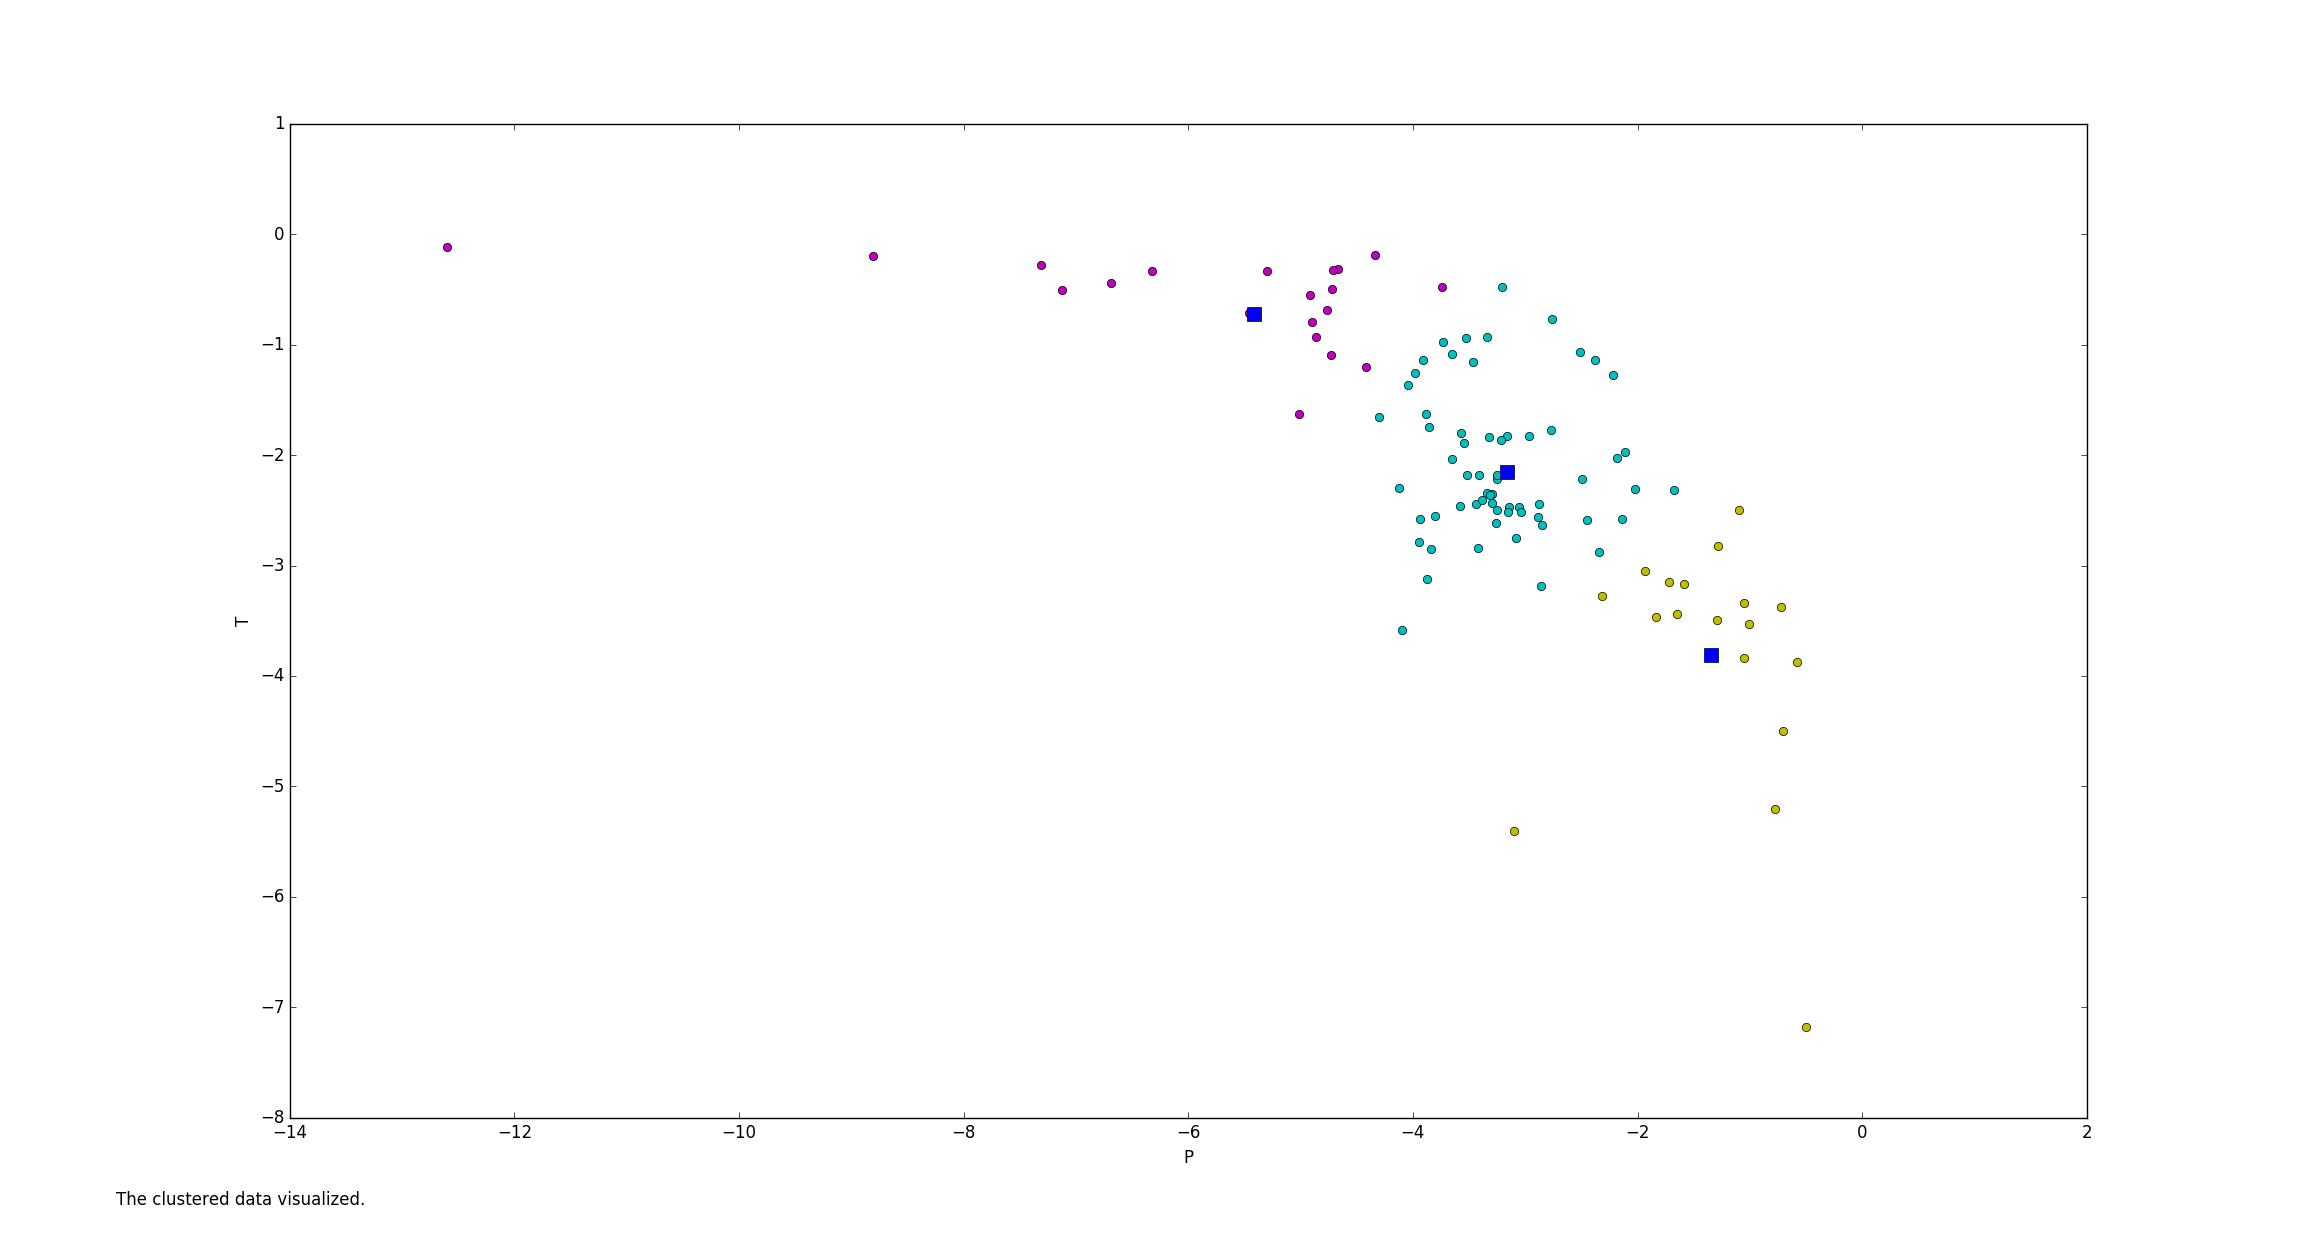

The clustered data visualized of Pulse vs Tones


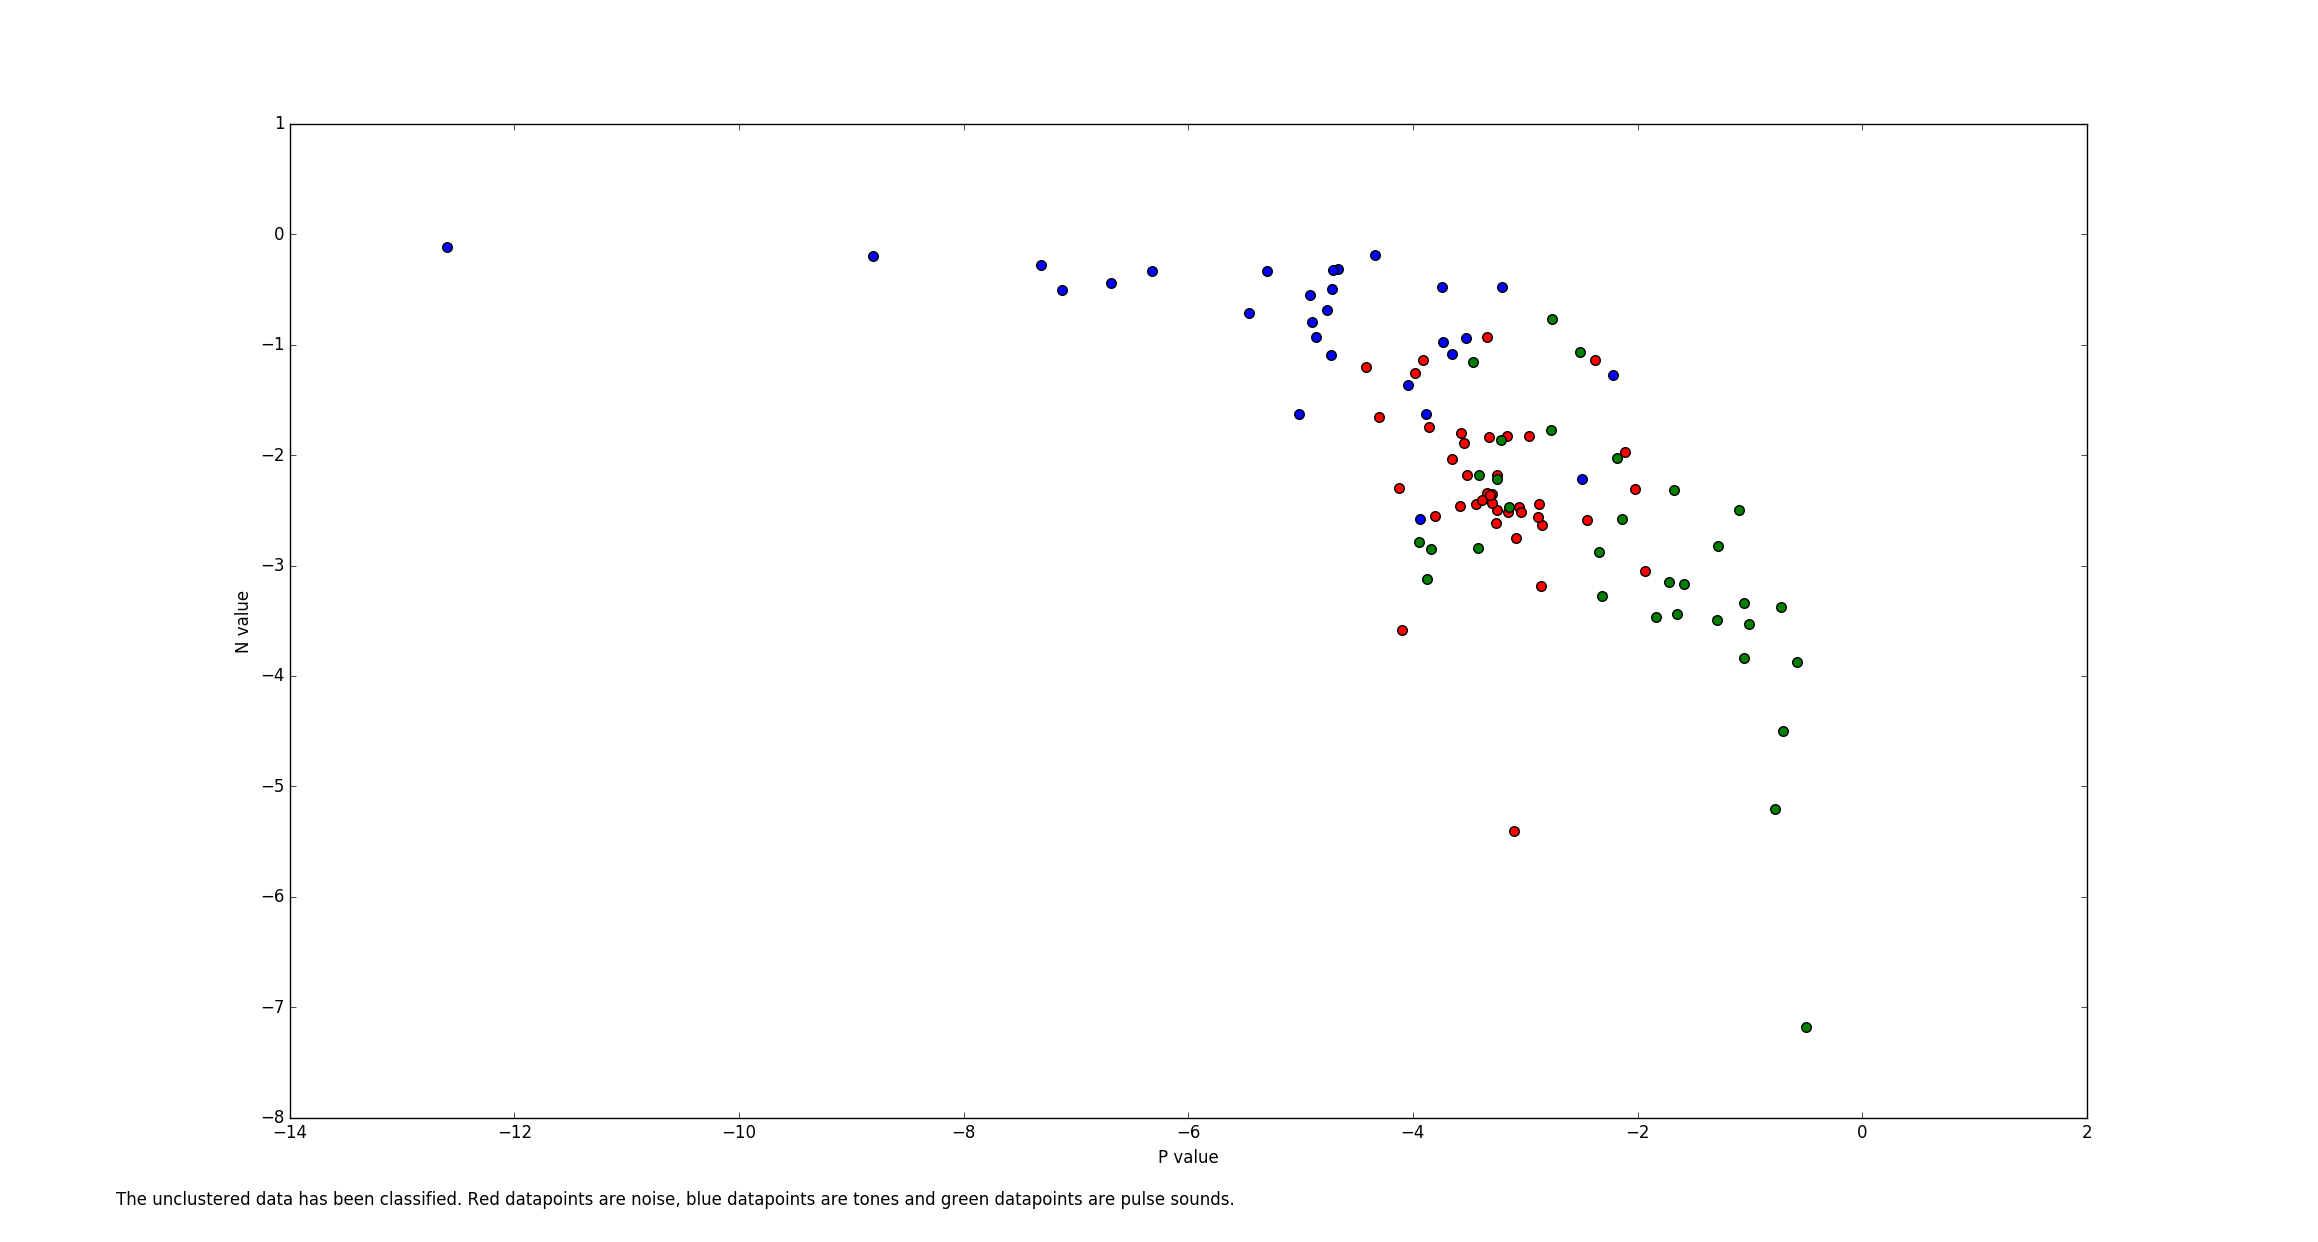

From a 2d image it is hard to draw conclusions on whether a datapoint has been added to the right cluster, we recommend looking at the 3d plot which gives a clearer view.


In [75]:
from IPython.display import Image 
a = Image(filename="clustered.png")
b = Image(filename="classified.png")

print("The first image shows the clustered datapoints. These datapoints have been clustered in only 2 dimensions.")
print("Both images plot P vs T value, one axis has the wrong label.")
print (" Unclustered Data")
display(a)
print("The clustered data visualized of Pulse vs Tones")
display(b)


print("From a 2d image it is hard to draw conclusions on whether a datapoint has been added to the right cluster, we recommend looking at the 3d plot which gives a clearer view.")


# 3d clustered vs classified


The first image shows the clustered datapoints in a 3d view, the second shows the classified, but unclustered data in a 3d view.
3D Representation of the K-Means Clustered Data


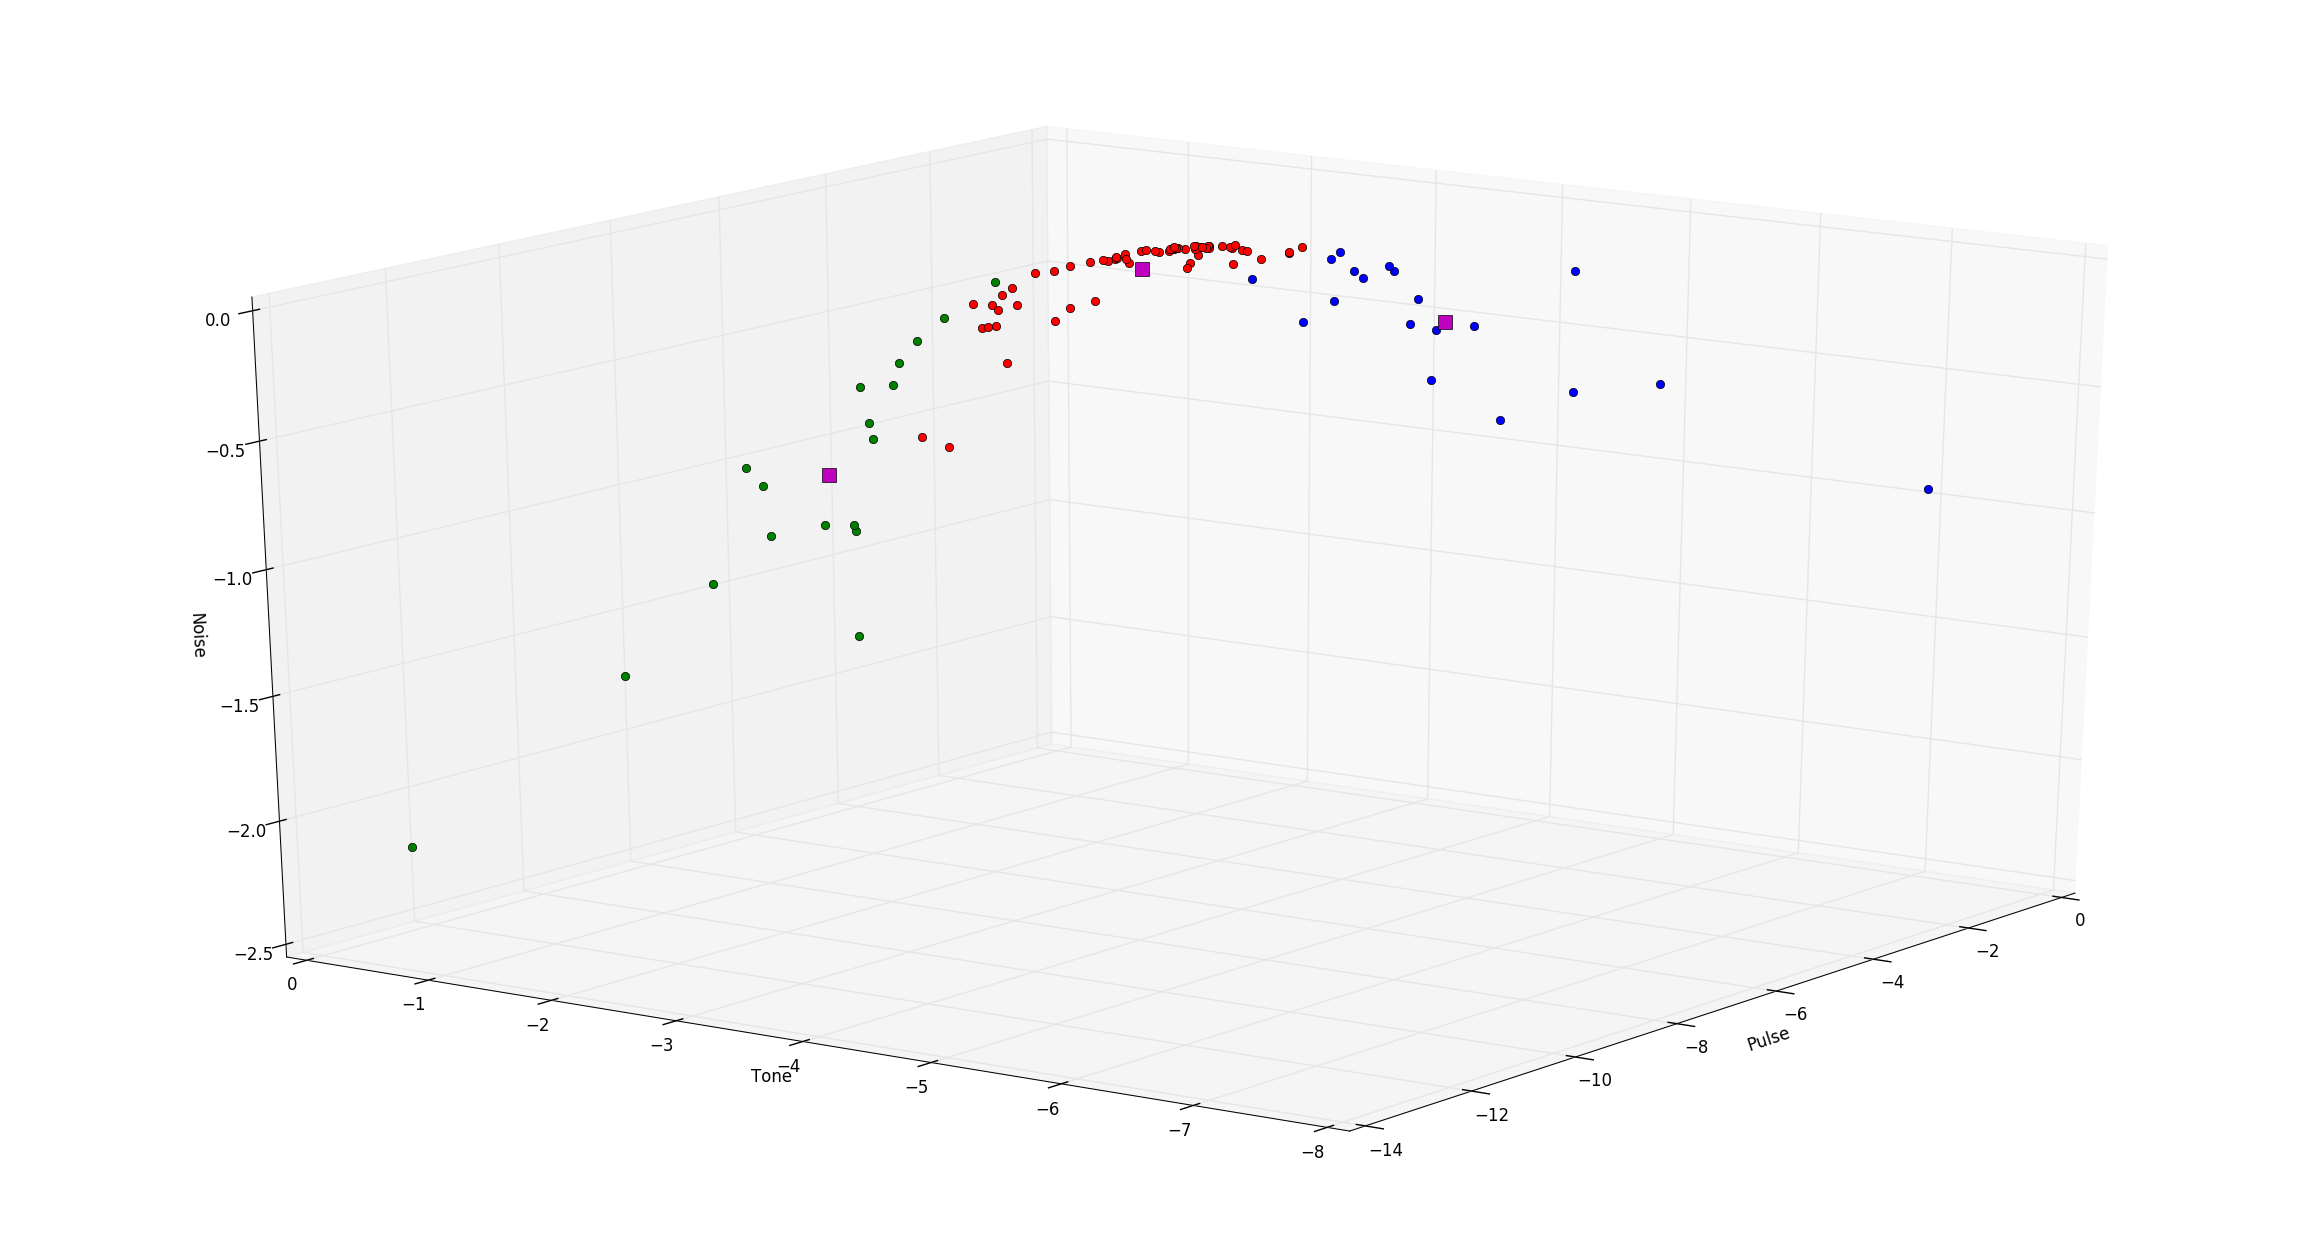

The data is clustered based on K-Means and euclidian distances between points.
3D visualisation of unclustered data


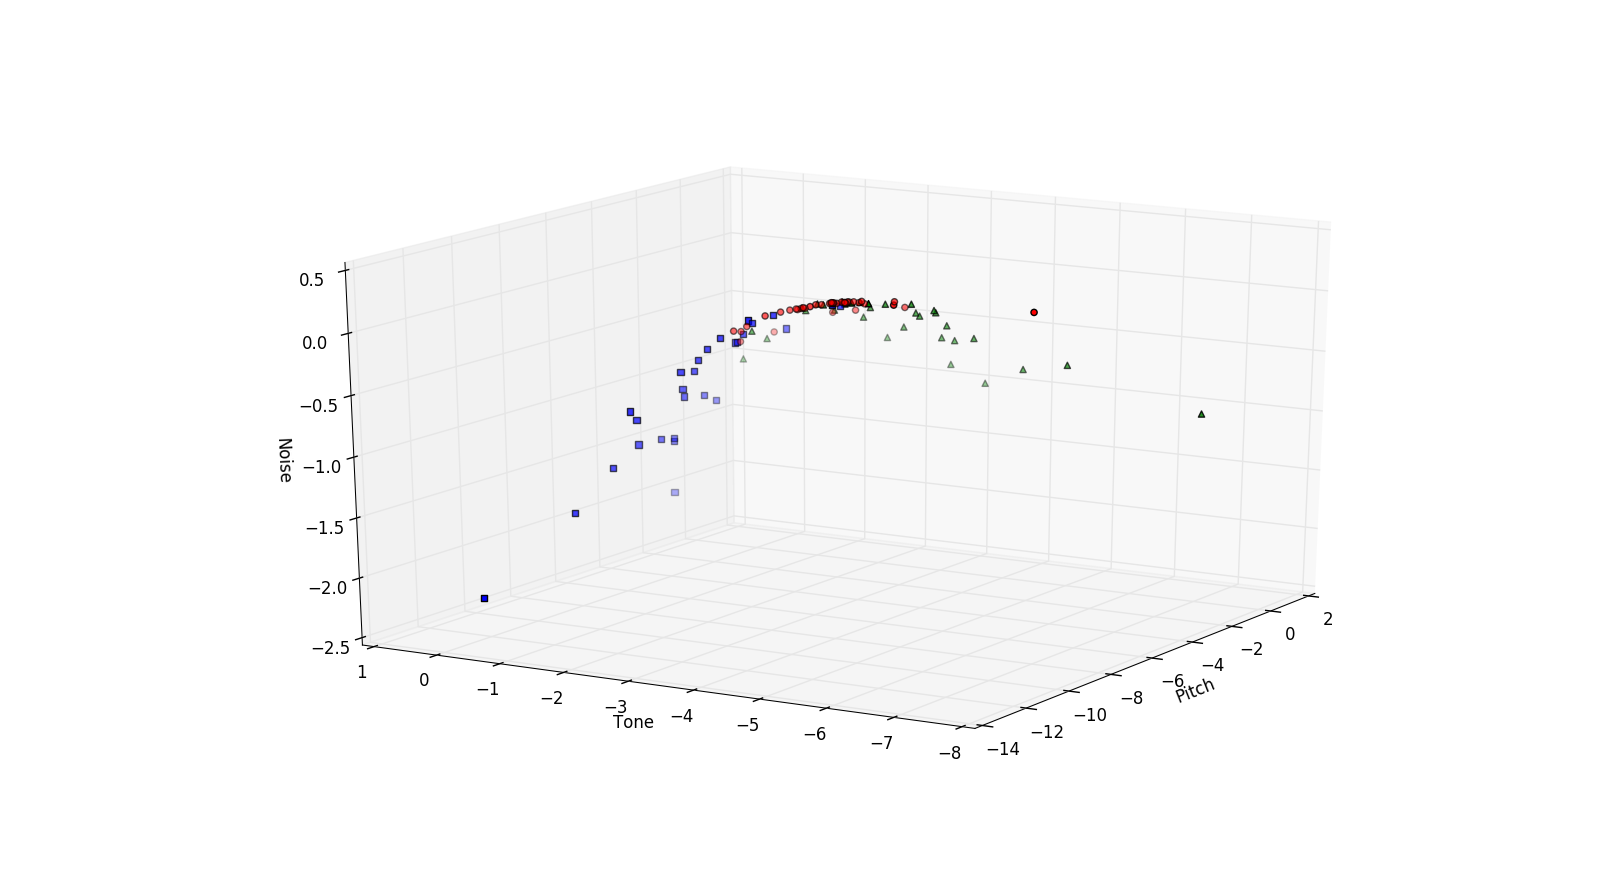

Data is classified based on the raw data labels given in the file


In [76]:
from IPython.display import Image 
a = Image(filename="3dclustered.png")
b = Image(filename="3dclassification.png")

print("The first image shows the clustered datapoints in a 3d view, the second shows the classified, but unclustered data in a 3d view.")

print('3D Representation of the K-Means Clustered Data')
display(a)
print('The data is clustered based on K-Means and euclidian distances between points.')
print('3D visualisation of unclustered data')
display(b)
print('Data is classified based on the raw data labels given in the file')

# Discussion of 3d plots

The 3d plots show a bit more information than the 2d ones, since the 'noise' dimension is lost in the 2d plots. The graphs look very similar, however there are a few datapoints which differ. 

The one that stands out the most is the datapoint called 'bubble', which is classified as noise, however, when clustered it is added to the pulse cluster.



# Comparison with manhattan distance calculation


The P vs T plot clustered data points where the distance has been calculated using the manhattan method.


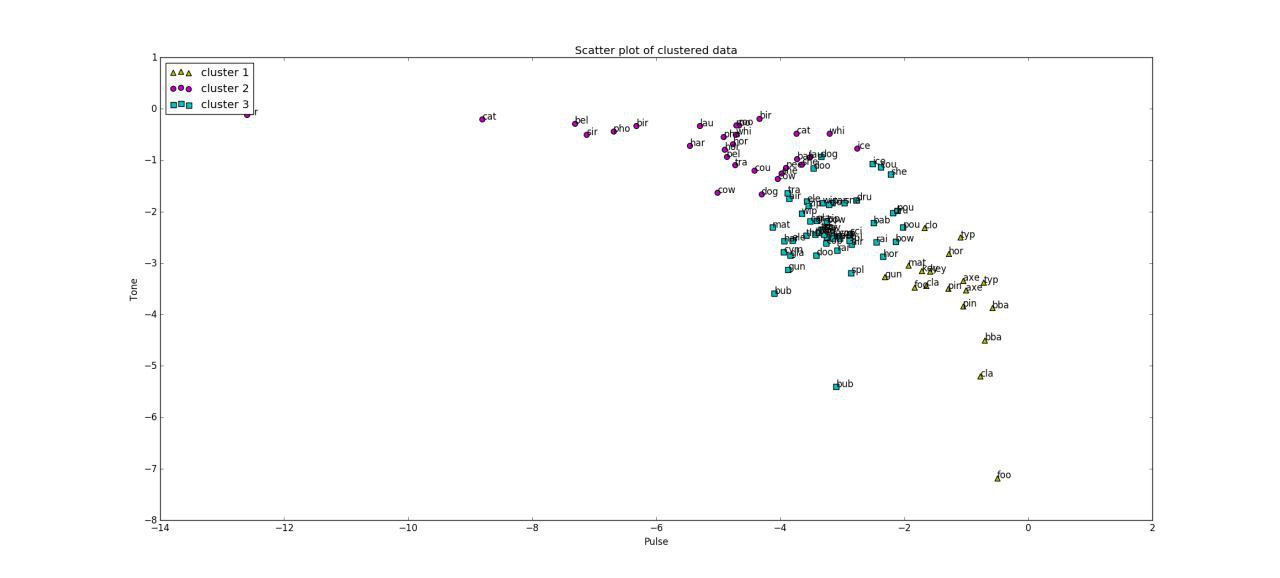

In [9]:
from IPython.display import Image 
print("The P vs T plot clustered data points where the distance has been calculated using the manhattan method.")
Image(filename="manhatten.jpg")

Comparing the manhattan distance method and the euclidean distance method does show some differences. The outer most datapoints are quite 'equal' (they are assigned to the same cluster) in both distance calculation methods.

The differences occur between the middle and outer clusters. When using the manhattan method, more datapoints from the center noise cluster change to the upper tone cluster.